# Redes Neuronales

In [ ]:
# Librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
#import seaborn as sns


from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [3]:
# datos

df_train = pd.read_csv('/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/Redes neuronales en Keras/archive/fashion-mnist_train.csv')
df_test = pd.read_csv('/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/Redes neuronales en Keras/archive/fashion-mnist_test.csv')

In [4]:
X_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values


In [5]:

X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values

In [6]:
# Escalar datos
X_train = X_train / 255
X_test = X_test / 255

In [7]:
ytrain = len(set(y_train))
ytest = len(set(y_test))

In [8]:
y_train = to_categorical(y_train, num_classes = ytrain)
y_test = to_categorical(y_test, num_classes = ytest)

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [10]:
input_shape = X_train.shape[1:]

In [11]:
m1 = Sequential()

2022-03-27 19:53:16.563318: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
m1.add(Conv2D(filters = 16, kernel_size = 3, input_shape = input_shape)) 

# Capa pooling
m1.add(MaxPooling2D(pool_size = 2)) 

# Capa de aplanamiento
m1.add(Flatten())

# Capa de salida
m1.add(Dense(10, activation = 'softmax')) # Funcion de activacion a usar

In [13]:
m1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [15]:
modelo = m1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3298 - acc: 0.8850 - val_loss: 0.3317 - val_acc: 0.8848
Epoch 2/15
1875/1875 [==============================] - 22s 11ms/step - loss: 0.3082 - acc: 0.8921 - val_loss: 0.3184 - val_acc: 0.8908
Epoch 3/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2927 - acc: 0.8985 - val_loss: 0.3135 - val_acc: 0.8925
Epoch 4/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2804 - acc: 0.9016 - val_loss: 0.3030 - val_acc: 0.8966
Epoch 5/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2699 - acc: 0.9043 - val_loss: 0.3050 - val_acc: 0.8962
Epoch 6/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2604 - acc: 0.9076 - val_loss: 0.3034 - val_acc: 0.8953
Epoch 7/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2523 - acc: 0.9104 - val_loss: 0.2969 - val_acc: 0.8996
Epoch 8/15
1875/1875 [==========================

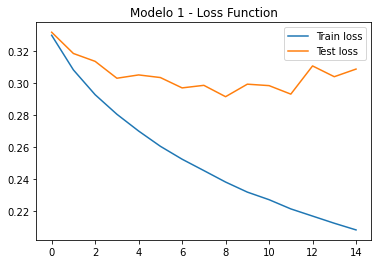

In [18]:
# Visualizar la perdida
plt.plot(modelo.history['loss'], label = 'Train loss')
plt.plot(modelo.history['val_loss'], label = 'Test loss')
plt.title('Modelo 1 - Loss Function')
plt.legend();

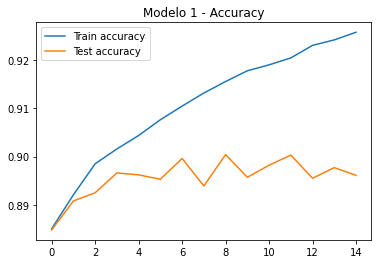

In [19]:
# Visualizar la precision
plt.plot(modelo.history['acc'], label = 'Train accuracy')
plt.plot(modelo.history['val_acc'], label = 'Test accuracy')
plt.title('Modelo 1 - Accuracy')
plt.legend();